In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
# took 150 top tags number of tags for 70% coverage of used tags
# took 500 samples from each classes cropping content to 51200 characters
# total -- 150*500 = 75000 samples

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Datasets/bq-results-20211207-150755-aeefndj5iocl.csv')
df.head()

,id,tag,content
0,54169960,c#|.net|wpf,WPF PrintDialog.PrintVisual is not working on ...
1,29268330,c#|.net|wpf,Count Number and Track IP Address of Software ...
2,29081229,c#|.net|wpf,Want to show hierarchical data(parent-chid) in...
3,29341824,c#|.net|wpf,move buttons in order\n<p>sorry for bad englis...
4,29132995,c#|.net|wpf,WPF DoubleUpDown command binding to up down bu...


In [4]:
df.tag.value_counts()

java|jsp|servlets                              611
javascript|node.js|mongodb                     593
javascript|jquery|datatables                   589
c#|asp.net|.net                                584
php|javascript|jquery                          577
                                              ... 
scala|apache-spark|apache-spark-sql            437
html|css|wordpress                             436
javascript|google-apps-script|google-sheets    435
c#|.net|wpf                                    434
windows|batch-file|cmd                         426
Name: tag, Length: 150, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75450 entries, 0 to 75449
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       75450 non-null  int64 
 1   tag      75450 non-null  object
 2   content  75450 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [3]:
# checking for duplicates
duplicate_pairs = df.sort_values('content', ascending=False).duplicated('content')
print("Total number of duplicate questions : ", duplicate_pairs.sum())
df = df[~duplicate_pairs]
print("Dataframe shape after duplicate removal : ", df.shape)

Total number of duplicate questions :  1
Dataframe shape after duplicate removal :  (75449, 3)


In [9]:
#Analysis of tag 
print("number of unique tag values is, {}".format(df['tag'].nunique()))

number of unique tag values is, 150


In [10]:
count_tag=df['tag'].value_counts()
count_tag.head()

java|jsp|servlets               611
javascript|node.js|mongodb      593
javascript|jquery|datatables    589
c#|asp.net|.net                 584
php|javascript|jquery           577
Name: tag, dtype: int64

In [11]:
print("{} occur maximum times , ie {} times".format(count_tag.index[count_tag.argmax()],count_tag.max() ))
print("{} occur minimum times , ie {} times".format(count_tag.index[count_tag.argmin()],count_tag.min() ))

java|jsp|servlets occur maximum times , ie 611 times
windows|batch-file|cmd occur minimum times , ie 426 times


In [12]:
# Analysis of content
df['content'][0]

'WPF PrintDialog.PrintVisual is not working on window 7\n<p>I am using <code>PrintVisual</code> to print a control; however, on Windows 7 the dialog appears but does not print anything. \nOn Windows 8 it shows an error. \nOnly works on Windows 10.</p>\n\n<p>Here are my code:</p>\n\n<pre><code>PrintDialog printDialog = new PrintDialog(); \nprintDialog.PrintVisual(gridReport, "Report"); \n</code></pre>\n\n<p>I saw this article but don\'t have any answer so I create a new question here hope that get the answer. \n<a href="https://stackoverflow.com/questions/39298578/printvisual-is-not-working-on-windows-7">Previous question I found but no answer</a>.</p>'

In [4]:
!pip install spacy
!python -m spacy download en_core_web_md

     |████████████████████████████████| 96.4 MB 1.3 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051302 sha256=f4f80c56eb73d492f4d4b33f1d5d9ce91e7310825f61e2900229de60210fa638
  Stored in directory: /tmp/pip-ephem-wheel-cache-27xl2g98/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [5]:
!pip install pandarallel 

  Created wheel for pandarallel: filename=pandarallel-1.5.4-py3-none-any.whl size=18688 sha256=3cfd342d57d5126f0ea056b25a2016f9a0e805ac708f28e47949c35b2ebd21d9
  Stored in directory: /root/.cache/pip/wheels/71/de/ad/759faf4fea1e9b0fd935da28847aa3ca2eef14a888c2dc4952
Successfully built pandarallel


In [6]:
# preprocessing of content
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True, use_memory_fs=False, )
import spacy
import en_core_web_md
import re 
from spacy.lang.en.stop_words import STOP_WORDS

nlp = en_core_web_md.load()

def preprocessor(text):
    text = re.sub('<[^>]*>', '', text) # Effectively removes HTML markup tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
    text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
    doc = nlp(text)
    text = ' '.join([token.lemma_ for token in doc if token.text not in STOP_WORDS])
    return text


INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [7]:
df['content_clean'] = df['content'].parallel_apply(preprocessor)


Streaming output truncated to the last 5000 lines.
  56.40% ::::::::::::::::::::::                   |    21276 /    37724 |      M  53.40% :::::::::::::::::::::                    |    20146 /    37725 |      
  56.42% ::::::::::::::::::::::                   |    21282 /    37724 |      M  53.41% :::::::::::::::::::::                    |    20150 /    37725 |      
  56.43% ::::::::::::::::::::::                   |    21286 /    37724 |      M  53.42% :::::::::::::::::::::                    |    20153 /    37725 |      
  56.43% ::::::::::::::::::::::                   |    21289 /    37724 |      M  53.43% :::::::::::::::::::::                    |    20157 /    377

In [8]:
df.head()

,id,tag,content,content_clean
0,54169960,c#|.net|wpf,WPF PrintDialog.PrintVisual is not working on ...,wpf printdialog printvisual work window 7 prin...
1,29268330,c#|.net|wpf,Count Number and Track IP Address of Software ...,count number track ip address software install...
2,29081229,c#|.net|wpf,Want to show hierarchical data(parent-chid) in...,want hierarchical datum parent chid datum grid...
3,29341824,c#|.net|wpf,move buttons in order\n<p>sorry for bad englis...,button order sorry bad english want button ord...
4,29132995,c#|.net|wpf,WPF DoubleUpDown command binding to up down bu...,wpf doubleupdown command bind button lt textbo...


In [9]:
df['tag']=df['tag'].apply(lambda x:x.split('|'))

In [10]:
df.head()

,id,tag,content,content_clean
0,54169960,"[c#, .net, wpf]",WPF PrintDialog.PrintVisual is not working on ...,wpf printdialog printvisual work window 7 prin...
1,29268330,"[c#, .net, wpf]",Count Number and Track IP Address of Software ...,count number track ip address software install...
2,29081229,"[c#, .net, wpf]",Want to show hierarchical data(parent-chid) in...,want hierarchical datum parent chid datum grid...
3,29341824,"[c#, .net, wpf]",move buttons in order\n<p>sorry for bad englis...,button order sorry bad english want button ord...
4,29132995,"[c#, .net, wpf]",WPF DoubleUpDown command binding to up down bu...,wpf doubleupdown command bind button lt textbo...


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(analyzer='word',max_features=10000,ngram_range=(1,3))
X=tfidf.fit_transform(df['content_clean'])

In [12]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['tag'])

In [13]:
X.shape, Y.shape

((75449, 10000), (75449, 166))

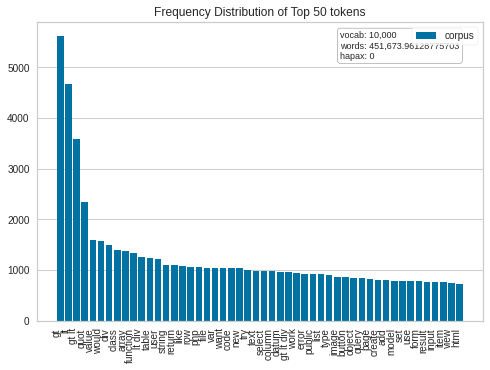

time: 810 ms (started: 2021-12-09 05:20:58 +00:00)


In [33]:
# Lets Visualise
from yellowbrick.text import FreqDistVisualizer
features = tfidf.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v')
visualizer.fit(X)
visualizer.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


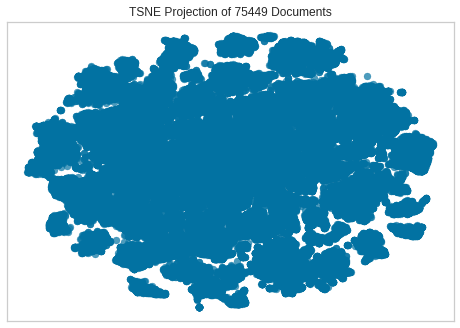

time: 17min 3s (started: 2021-12-09 05:21:04 +00:00)


In [34]:
from yellowbrick.text import TSNEVisualizer
tsne = TSNEVisualizer()
tsne.fit(X)
tsne.show()

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


### Metrics
```
# precision= TP/ TP + FP
# Recall = TP / TP + FN
# F1 micro = 2 Precison * Recall / precison + recall 

# F1 macro = 1/|c| * F1 score 

# Hamming loss = 1/D(# of samples) * xor(x^ , xi) / # of labels
```



In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, hamming_loss

ModelsPerformance = {}

def metrics_report(modelName, test_labels, predictions):
    accuracy = accuracy_score(test_labels, predictions)

    macro_precision = precision_score(test_labels, predictions, average='macro')
    macro_recall = recall_score(test_labels, predictions, average='macro')
    macro_f1 = f1_score(test_labels, predictions, average='macro')

    micro_precision = precision_score(test_labels, predictions, average='micro')
    micro_recall = recall_score(test_labels, predictions, average='micro')
    micro_f1 = f1_score(test_labels, predictions, average='micro')
    
    hamLoss = hamming_loss(test_labels, predictions)
    print("------" + modelName + " Model Metrics-----")
    print("Accuracy: {:.4f}\nHamming Loss: {:.4f}\nPrecision:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nRecall:\n  - Macro: {:.4f}\n  - Micro: {:.4f}\nF1-measure:\n  - Macro: {:.4f}\n  - Micro: {:.4f}"\
          .format(accuracy, hamLoss, macro_precision, micro_precision, macro_recall, micro_recall, macro_f1, micro_f1))
    ModelsPerformance[modelName] = micro_f1

In [ ]:
!pip install ipython-autotime
%load_ext autotime

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier

time: 90.6 ms (started: 2021-12-09 04:43:39 +00:00)


In [23]:
knnClf = KNeighborsClassifier()

knnClf.fit(X_train, y_train)
knnPredictions = knnClf.predict(X_test)
metrics_report("knn", y_test, knnPredictions)

------knn Model Metrics-----
Accuracy: 0.3508
Hamming Loss: 0.0103
Precision:
  - Macro: 0.7804
  - Micro: 0.8076
Recall:
  - Macro: 0.4913
  - Micro: 0.5657
F1-measure:
  - Macro: 0.5845
  - Micro: 0.6654
time: 2min 14s (started: 2021-12-09 04:47:58 +00:00)


In [24]:
from sklearn.tree import DecisionTreeClassifier

dtClassifier = DecisionTreeClassifier()
dtClassifier.fit(X_train, y_train)
dtPreds = dtClassifier.predict(X_test)
metrics_report("Decision Tree", y_test, dtPreds)

------Decision Tree Model Metrics-----
Accuracy: 0.5665
Hamming Loss: 0.0083
Precision:
  - Macro: 0.7126
  - Micro: 0.7691
Recall:
  - Macro: 0.6971
  - Micro: 0.7691
F1-measure:
  - Macro: 0.7035
  - Micro: 0.7691
time: 6min 51s (started: 2021-12-09 04:50:26 +00:00)


In [22]:
from sklearn.naive_bayes import MultinomialNB

nbClassifier = OneVsRestClassifier(MultinomialNB())
nbClassifier.fit(X_train, y_train)

nbPreds = nbClassifier.predict(X_test)
metrics_report("Multinomial NB", y_test, nbPreds)

------Multinomial NB Model Metrics-----
Accuracy: 0.1472
Hamming Loss: 0.0113
Precision:
  - Macro: 0.6352
  - Micro: 0.7307
Recall:
  - Macro: 0.3784
  - Micro: 0.5974
F1-measure:
  - Macro: 0.4300
  - Micro: 0.6573
time: 16.3 s (started: 2021-12-09 04:47:30 +00:00)


In [21]:
from sklearn.svm import LinearSVC

svmClassifier = OneVsRestClassifier(LinearSVC(), n_jobs=-1)
svmClassifier.fit(X_train, y_train)

svmPreds = svmClassifier.predict(X_test)
metrics_report("SVC Sq. Hinge Loss", y_test, svmPreds)

------SVC Sq. Hinge Loss Model Metrics-----
Accuracy: 0.5017
Hamming Loss: 0.0052
Precision:
  - Macro: 0.8852
  - Micro: 0.9178
Recall:
  - Macro: 0.7051
  - Micro: 0.7844
F1-measure:
  - Macro: 0.7744
  - Micro: 0.8459
time: 49.5 s (started: 2021-12-09 04:46:15 +00:00)


In [19]:
# SGD CLASSIFIER
from sklearn.linear_model import SGDClassifier

### Using the Log Loss (Linear MOdels --> Logistic regression)
sgd_log = OneVsRestClassifier(SGDClassifier(penalty='l2',loss="log",alpha=0.000001), n_jobs=-1)
sgd_log.fit(X_train, y_train)
sgd_logPreds = sgd_log.predict(X_test)

metrics_report("SGDC Log Loss", y_test, sgd_logPreds)

------SGDC Log Loss Model Metrics-----
Accuracy: 0.4812
Hamming Loss: 0.0055
Precision:
  - Macro: 0.8650
  - Micro: 0.9018
Recall:
  - Macro: 0.7006
  - Micro: 0.7809
F1-measure:
  - Macro: 0.7684
  - Micro: 0.8370
time: 57.2 s (started: 2021-12-09 04:43:58 +00:00)


In [20]:
## Hinge Loss ---> Linear SVM Classifier 
sgd_hinge = OneVsRestClassifier(SGDClassifier(penalty='l2',loss="hinge",alpha=0.000001), n_jobs=-1)
sgd_hinge.fit(X_train, y_train)
sgd_hinge_preds = sgd_hinge.predict(X_test)

metrics_report("SGDC Hinge Loss", y_test, sgd_hinge_preds)

------SGDC Hinge Loss Model Metrics-----
Accuracy: 0.4752
Hamming Loss: 0.0059
Precision:
  - Macro: 0.8281
  - Micro: 0.8668
Recall:
  - Macro: 0.7258
  - Micro: 0.7991
F1-measure:
  - Macro: 0.7703
  - Micro: 0.8316
time: 44.7 s (started: 2021-12-09 04:45:04 +00:00)


In [25]:
ModelsPerformance

{'Decision Tree': 0.7690523525513584,
 'Multinomial NB': 0.6573487767231007,
 'SGDC Hinge Loss': 0.8315670904117147,
 'SGDC Log Loss': 0.8370033622200124,
 'SVC Sq. Hinge Loss': 0.845882661203878,
 'knn': 0.6653502903389238}

time: 4.21 ms (started: 2021-12-09 04:57:53 +00:00)


In [28]:
summary_df=pd.DataFrame(ModelsPerformance.items(),columns=['Model','Performance'])
summary_df

,Model,Performance
0,SGDC Log Loss,0.837003
1,SGDC Hinge Loss,0.831567
2,SVC Sq. Hinge Loss,0.845883
3,Multinomial NB,0.657349
4,knn,0.665350
5,Decision Tree,0.769052


time: 21.7 ms (started: 2021-12-09 05:04:38 +00:00)



### Observations

1.   Linear classifer Model perform higher than other model
2.   Also linear model take lesser time to fit higher dimesional data
3.  Linear SVC with squared hinge loss perform much better



In [30]:
# Random Test

test_x = ['get JSon.Stringify value in controller passed through Ajax']
test_x_vec=tfidf.transform(test_x)

time: 3.56 ms (started: 2021-12-09 05:13:49 +00:00)


In [31]:
svmClassifier.predict(test_x_vec)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

time: 25.7 ms (started: 2021-12-09 05:14:40 +00:00)


In [32]:
mlb.inverse_transform(svmClassifier.predict(test_x_vec))

[('javascript',)]

time: 30.1 ms (started: 2021-12-09 05:16:10 +00:00)


### How we can improve this model ?
1. Model Multilabel Text Classification RNN, LSTM, Bi-Directional LSTM, Etc for higher accuracy
2. Can use latest Sequence to Sequence model and also transformer based model such as bert


